In [1]:
import pandas as pd


In [2]:
df_filter_brut = pd.read_csv("./df_filter.tsv", sep='\t', index_col = 0 , decimal='.')
df_filter_brut

,BindingDB_Reactant_set_id,Name,Ligand_SMILES,IC50 (nM),pIC50
0,189668,tacrine,Nc1c2CCCCc2nc2ccccc12,5.460000e-06,14.262807
1,51223275,,CCC(=O)N1CCCC2(O)C1N(C)c1ccccc21,1.000000e-05,14.000000
2,51223289,,CN1C2N(CCCC2(O)c2ccccc12)C(=O)c1ccc(F)cc1,1.000000e-04,13.000000
3,189665,BindingDB_86769_mol_1,NNc1ccc(cn1)C(=O)NCCCCCNc1c2CCCCc2nc2ccccc12,3.080000e-04,12.511449
4,189667,BindingDB_86771_mol_1,NNc1ccc(cc1)C(=O)NCCCCCCCCCNc1c2CCCCc2nc2ccccc12,3.700000e-04,12.431798
...,...,...,...,...,...
4844,51036767,BindingDB_50423744_mol_1,CCCCc1cc(C2=NOC(CO)C2)c(Cl)[nH]1,2.098940e+07,1.678000
4845,51036769,BindingDB_50423746_mol_1,CCCCc1cc(C2=NOC(C2)C(=O)OCC)c(Cl)[nH]1,6.966265e+07,1.157000
4846,51036770,BindingDB_50423747_mol_1,CCCCc1cc(C2=NOC(C2)C(=O)Oc2ccccc2)c(Cl)[nH]1,7.211075e+07,1.142000
4847,51036768,BindingDB_50423745_mol_1,CCCCc1cc(C2=NOC(CC(=O)OC)C2)c(Cl)[nH]1,1.603245e+08,0.795000


# "df_filter" IS FILTERED BY DOCKING RESULTS

In [20]:
df_ = pd.read_csv("./Filter_file_docking_output.tsv", sep = "\t")
df_ = df_.drop('Unnamed: 0', axis = 1)
df_.columns


Index(['C0', 'CO2minus', 'Cofactor (VdW)', 'Cofactor (elec)',
       'Cofactor (hbond)', 'Csp2', 'Csp3', 'DOF',
       'E-Inter (cofactor - ligand)', 'E-Inter (protein - ligand)',
       'E-Inter (water - ligand)', 'E-Inter total', 'E-Intra (clash)',
       'E-Intra (elec)', 'E-Intra (hbond)', 'E-Intra (sp2-sp2)',
       'E-Intra (steric)', 'E-Intra (tors)', 'E-Intra (tors, ligand atoms)',
       'E-Intra (vdw)', 'E-Soft Constraint Penalty', 'E-Solvation', 'E-Total',
       'Electro', 'ElectroLong', 'Energy', 'Filename', 'HBond', 'HeavyAtoms',
       'LE1', 'LE3', 'Ligand', 'MW', 'N', 'Name', 'NoHBond90', 'Nplus', 'OH',
       'OPO32minus', 'OS', 'PoseEnergy', 'RMSD', 'RerankScore', 'Run',
       'SimilarityScore', 'Steric', 'Torsions', 'VdW (LJ12-6)', 'carbonyl',
       'halogen', 'SMILES'],
      dtype='object')

In [52]:
count = 0
List_Molecules = []
for i in df_['Ligand']:
    print (i)
    if i.startswith('BindingDB_Reactant_set_id'):
        a = i.split('_')[4]
        print (a)
        List_Molecules.append(str(a))
    
df_filter = pd.DataFrame() 

for idx, i in enumerate(df_filter_brut['BindingDB_Reactant_set_id']):
    
    if str(i) in List_Molecules:
        
        df_filter = df_filter.append(pd.DataFrame(df_filter_brut.iloc[idx, :]).T)
        
        
df_filter = df_filter.sort_values(by = 'BindingDB_Reactant_set_id').set_index([list(range(0,len(df_filter)))])
df_filter

BindingDB_Reactant_set_id_51136942_
51136942
BindingDB_Reactant_set_id_51136943_
51136943
BindingDB_Reactant_set_id_51136948_
51136948
BindingDB_Reactant_set_id_51136941_
51136941
BindingDB_Reactant_set_id_51136940_
51136940
BindingDB_Reactant_set_id_51189678_
51189678
BindingDB_Reactant_set_id_311680_
311680
BindingDB_Reactant_set_id_51218272_
51218272
BindingDB_Reactant_set_id_50525179_
50525179
BindingDB_Reactant_set_id_50534781_
50534781
BindingDB_Reactant_set_id_50534786_
50534786
BindingDB_Reactant_set_id_50534791_
50534791
BindingDB_Reactant_set_id_50991059_
50991059
BindingDB_Reactant_set_id_50991066_
50991066
BindingDB_Reactant_set_id_50991057_
50991057
BindingDB_Reactant_set_id_50492722_
50492722
BindingDB_Reactant_set_id_50492723_
50492723
BindingDB_Reactant_set_id_50525146_
50525146
BindingDB_Reactant_set_id_50510875_
50510875
BindingDB_Reactant_set_id_50492721_
50492721
BindingDB_Reactant_set_id_50937810_
50937810
BindingDB_Reactant_set_id_50937802_
50937802
BindingDB_Reac

51064564
BindingDB_Reactant_set_id_51069421_
51069421
BindingDB_Reactant_set_id_51073891_
51073891
BindingDB_Reactant_set_id_50428050_
50428050
BindingDB_Reactant_set_id_50981889_
50981889
BindingDB_Reactant_set_id_50490297_
50490297
BindingDB_Reactant_set_id_50501541_
50501541
BindingDB_Reactant_set_id_51218484_
51218484
BindingDB_Reactant_set_id_51218489_
51218489
BindingDB_Reactant_set_id_50508633_
50508633
BindingDB_Reactant_set_id_50508634_
50508634
BindingDB_Reactant_set_id_50439322_
50439322
BindingDB_Reactant_set_id_50472150_
50472150
BindingDB_Reactant_set_id_50802102_
50802102
BindingDB_Reactant_set_id_51056229_
51056229
BindingDB_Reactant_set_id_51056217_
51056217
BindingDB_Reactant_set_id_50490300_
50490300
BindingDB_Reactant_set_id_50490301_
50490301
BindingDB_Reactant_set_id_50508635_
50508635
BindingDB_Reactant_set_id_50431029_ [Region: 0]
50431029
BindingDB_Reactant_set_id_50490303_
50490303
BindingDB_Reactant_set_id_50490296_
50490296
BindingDB_Reactant_set_id_50394876

,BindingDB_Reactant_set_id,Name,Ligand_SMILES,IC50 (nM),pIC50
0,17337,Galanthamine,COc1ccc2CN(CCCCCCCCN3C(=O)c4ccccc4C3=O)CC[C@@]...,72,7.14267
1,17338,Galanthamine,COc1ccc2C=[N+](CCCCCCCCN3C(=O)c4ccccc4C3=O)CC[...,11,7.95861
2,17339,Galanthamine,C[N+]1=Cc2ccc(OCCCCCCCCN3C(=O)c4ccccc4C3=O)c3O...,203,6.6925
3,17340,Galanthamine,COc1ccc2C=[N+](C)CC[C@@]34C=C[C@H](O)C[C@@H]3O...,266,6.57512
4,24314,15a,COc1cc(cc(OC)c1OC)C(=O)NNc1c2CCCCc2nc2ccccc12,2260,5.64589
...,...,...,...,...,...
2412,51316613,NaN,CC1CCCN(CCCCCCCOc2cccc(Cl)c2)C1,3800,5.42022
2413,51316630,NaN,CC1CCCN(CCCCCOc2ccc(Cl)cc2)C1,23610,4.6269
2414,51316632,NaN,CC1CCN(CCCCCCOc2ccc(Cl)cc2)CC1,8110,5.09098
2415,51316637,NaN,CC1CCCN(CCCCCCCOc2ccc(Cl)cc2)C1,4510,5.34582


#  Import molecular descriptors  2D Alvades PCC 0.95 and filter matrix





In [53]:
Data_Frame = pd.read_csv("./DataFrame_Bindingdatabase", sep = "\t", decimal = ".")

descriptors = pd.read_csv("../../Descriptors/output_alvadescriptorsPCC0.95.txt", sep = "\t", index_col = 0)

df_2Ddescriptors_Alv_PCC095 = descriptors[5:10035]
df_2Ddescriptors_Alv_PCC095.index = [i for i in range (10030)]

df_2Ddescriptors_Alv_PCC095 = pd.merge(Data_Frame["BindingDB_Reactant_set_id"], df_2Ddescriptors_Alv_PCC095.drop(["NAME"],axis = 1), left_index = True, right_index = True)

df_2Ddescriptors_Alv_PCC095


,BindingDB_Reactant_set_id,MW,AMW,Me,Mp,Mi,GD,nTA,nBM,RBN,...,s2_numRotBonds,s3_numRotBonds,s4_numRotBonds,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_phSize,s34_phRelSize
0,51056129,198.29,6.8376,0.9829,0.6752,1.1203,0.1619,1,11,0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,51056130,483.76,6.2826,0.9795,0.6485,1.1246,0.0619,3,18,13,...,0.0,2.0000,9.0,0.0,0.0,6.0,11.0,34.0,4.0,0.1111
2,51056131,546.26,6.5814,0.9821,0.6544,1.1249,0.0567,4,18,15,...,0.0,1.0000,12.0,0.0,0.0,0.0,17.0,37.0,4.0,0.1026
3,51056132,518.20,6.7299,0.9837,0.6597,1.1239,0.0601,4,18,13,...,0.0,1.0000,10.0,0.0,0.0,0.0,17.0,35.0,4.0,0.1081
4,51056133,504.17,6.8131,0.9846,0.6626,1.1233,0.0619,4,18,12,...,0.0,1.0000,9.0,0.0,0.0,0.0,17.0,34.0,4.0,0.1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,51297250,350.51,6.7406,0.9895,0.6510,1.1302,0.0892,3,16,4,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
10026,51297258,356.84,8.4962,1.0136,0.6933,1.1253,0.0933,3,17,2,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
10027,51283328,591.08,7.6764,0.9963,0.6722,1.1300,0.0553,3,22,11,...,0.0,1.0000,8.0,0.0,0.0,10.0,11.0,35.0,5.0,0.1282
10028,51288963,401.62,6.8071,0.9901,0.6515,1.1233,0.0794,5,14,7,...,0.0,0.6667,6.0,0.0,0.0,0.0,12.0,24.5,4.0,0.1429


# Filtring Data Frame Molecular Descriptors 2D by the DataFrame "df_filter"

In [54]:
Ddescriptors_Alv_PCC095_filter = [] 

for idx, value in enumerate(df_2Ddescriptors_Alv_PCC095.iloc[:,0]):
    if value in list(df_filter.iloc[:,0]):
        
        Ddescriptors_Alv_PCC095_filter.append(df_2Ddescriptors_Alv_PCC095.iloc[idx,:]) 
    
df_2Ddescriptors_Alv_PCC095_filter = pd.DataFrame(Ddescriptors_Alv_PCC095_filter)
df_2Ddescriptors_Alv_PCC095_filter.index = [i for i in range(len(df_filter))]


df_2Ddescriptors_Alv_PCC095_filter = df_2Ddescriptors_Alv_PCC095_filter.sort_values(by = 'BindingDB_Reactant_set_id')
index = list(range(0,len(df_2Ddescriptors_Alv_PCC095_filter)))
df_2Ddescriptors_Alv_PCC095_filter = df_2Ddescriptors_Alv_PCC095_filter.set_index([index])
df_2Ddescriptors_Alv_PCC095_filter

,BindingDB_Reactant_set_id,MW,AMW,Me,Mp,Mi,GD,nTA,nBM,RBN,...,s2_numRotBonds,s3_numRotBonds,s4_numRotBonds,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_phSize,s34_phRelSize
0,17337.0,530.72,6.8925,0.9967,0.6492,1.1236,0.0594,4.0,15.0,10.0,...,0.0,3.6667,9.3333,0.0,0.0,5.3333,8.6667,34.1667,5.6667,0.1453
1,17338.0,529.71,6.9699,0.9974,0.6527,1.1225,0.0594,4.0,16.0,10.0,...,0.0,3.6667,9.3333,0.0,0.0,5.3333,8.6667,34.1667,5.6667,0.1453
2,17339.0,529.71,6.9699,0.9974,0.6527,1.1225,0.0594,4.0,16.0,10.0,...,0.0,0.0000,10.0000,0.0,0.0,1.3333,10.6667,34.1667,5.8333,0.1496
3,17340.0,286.38,6.9849,0.9995,0.6488,1.1237,0.1143,3.0,8.0,1.0,...,0.0,0.3333,0.6667,0.0,0.0,1.3333,4.6667,16.1667,2.8333,0.1349
4,24314.0,407.51,7.4093,1.0061,0.6584,1.1254,0.0759,4.0,18.0,6.0,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,51316613.0,323.95,6.2298,0.9809,0.6296,1.1323,0.0996,2.0,6.0,9.0,...,0.0,0.0000,9.0000,0.0,0.0,0.0000,6.0000,20.0000,2.0000,0.0909
2413,51316630.0,295.89,6.4324,0.9835,0.6351,1.1315,0.1105,2.0,6.0,7.0,...,0.0,0.0000,7.0000,0.0,0.0,0.0000,6.0000,18.0000,2.0000,0.1000
2414,51316632.0,309.92,6.3249,0.9821,0.6322,1.1319,0.1048,2.0,6.0,8.0,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2415,51316637.0,323.95,6.2298,0.9809,0.6296,1.1323,0.0996,2.0,6.0,9.0,...,0.0,0.0000,9.0000,0.0,0.0,0.0000,6.0000,20.0000,2.0000,0.0909


# Data Frame to construc the models 2D


In [56]:
df_2ML = pd.merge(df_filter, df_2Ddescriptors_Alv_PCC095_filter.drop("BindingDB_Reactant_set_id", axis = 1), left_index = True, right_index = True)

df_2ML

,BindingDB_Reactant_set_id,Name,Ligand_SMILES,IC50 (nM),pIC50,MW,AMW,Me,Mp,Mi,...,s2_numRotBonds,s3_numRotBonds,s4_numRotBonds,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_phSize,s34_phRelSize
0,17337,Galanthamine,COc1ccc2CN(CCCCCCCCN3C(=O)c4ccccc4C3=O)CC[C@@]...,72,7.14267,530.72,6.8925,0.9967,0.6492,1.1236,...,0.0,3.6667,9.3333,0.0,0.0,5.3333,8.6667,34.1667,5.6667,0.1453
1,17338,Galanthamine,COc1ccc2C=[N+](CCCCCCCCN3C(=O)c4ccccc4C3=O)CC[...,11,7.95861,529.71,6.9699,0.9974,0.6527,1.1225,...,0.0,3.6667,9.3333,0.0,0.0,5.3333,8.6667,34.1667,5.6667,0.1453
2,17339,Galanthamine,C[N+]1=Cc2ccc(OCCCCCCCCN3C(=O)c4ccccc4C3=O)c3O...,203,6.6925,529.71,6.9699,0.9974,0.6527,1.1225,...,0.0,0.0000,10.0000,0.0,0.0,1.3333,10.6667,34.1667,5.8333,0.1496
3,17340,Galanthamine,COc1ccc2C=[N+](C)CC[C@@]34C=C[C@H](O)C[C@@H]3O...,266,6.57512,286.38,6.9849,0.9995,0.6488,1.1237,...,0.0,0.3333,0.6667,0.0,0.0,1.3333,4.6667,16.1667,2.8333,0.1349
4,24314,15a,COc1cc(cc(OC)c1OC)C(=O)NNc1c2CCCCc2nc2ccccc12,2260,5.64589,407.51,7.4093,1.0061,0.6584,1.1254,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,51316613,NaN,CC1CCCN(CCCCCCCOc2cccc(Cl)c2)C1,3800,5.42022,323.95,6.2298,0.9809,0.6296,1.1323,...,0.0,0.0000,9.0000,0.0,0.0,0.0000,6.0000,20.0000,2.0000,0.0909
2413,51316630,NaN,CC1CCCN(CCCCCOc2ccc(Cl)cc2)C1,23610,4.6269,295.89,6.4324,0.9835,0.6351,1.1315,...,0.0,0.0000,7.0000,0.0,0.0,0.0000,6.0000,18.0000,2.0000,0.1000
2414,51316632,NaN,CC1CCN(CCCCCCOc2ccc(Cl)cc2)CC1,8110,5.09098,309.92,6.3249,0.9821,0.6322,1.1319,...,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2415,51316637,NaN,CC1CCCN(CCCCCCCOc2ccc(Cl)cc2)C1,4510,5.34582,323.95,6.2298,0.9809,0.6296,1.1323,...,0.0,0.0000,9.0000,0.0,0.0,0.0000,6.0000,20.0000,2.0000,0.0909


# Normalização dos valores de pIC50 em uma escala de base 1

In [57]:
# normalização dos valores de pIC50 em uma escala de base 1
def norm_pIC50_col(data):
    norm=[]
    for elem in data["pIC50"]:
        if elem < 1:
            elem = 1
        if elem > 14:
            elem = 14
        norm.append(elem)
    data["pIC50_norm"]=norm
    x=data.drop("pIC50",1)
    return x

df_m_pIC50_norm=norm_pIC50_col(df_2ML)

##########################################################
#Descriçaõ da coluna nova de pIC50
print(df_m_pIC50_norm["pIC50_norm"].describe())



count    2417.000000
mean        5.971813
std         1.362889
min         1.142000
25%         4.921906
50%         5.924453
75%         6.920819
max        14.000000
Name: pIC50_norm, dtype: float64


# Molecule Bioactivity Classification 


In [82]:
#Classificação da bioatividade
Bioactivity_class = []
ativas = 0
inativas = 0
intermediate = 0
for i in df_m_pIC50_norm.loc[:,"pIC50_norm"]:
    if i >= df_m_pIC50_norm["pIC50_norm"].mean() + 0.6:
        Bioactivity_class.append("Active")
        ativas += 1
    elif  i <= df_m_pIC50_norm["pIC50_norm"].mean() - 0.6:
        Bioactivity_class.append("Inactive")
        inativas += 1
    else:
        Bioactivity_class.append("Intermediary")
        intermediate += 1
#Adição da coluna ao DF principal        
df_m_pIC50_norm["Bioactivity_class"] = Bioactivity_class
#Salvado do arquivo xlsx
df_m_pIC50_norm.to_csv("df_m_pIC50_norm.csv", sep = "\t", encoding = "utf-8")
print("O numero de moleculas ativas é:  {}".format(ativas))
print("O numero de moleculas intermedias é:  {}".format(intermediate))
print("O numero de moleculas inativas é:  {}".format(inativas))

O numero de moleculas ativas é:  786
O numero de moleculas intermedias é:  724
O numero de moleculas inativas é:  907


# 2 BIOACTIVITY CLASS DATA FRAME GENERATIONTO MACHINE LEARNING

In [83]:

#Geraçaõ da faixa de valores entre especies ativas e inativas para o nosso modelo  
df_ML_2class = df_m_pIC50_norm[df_m_pIC50_norm.Bioactivity_class != "Intermediary"]
df_ML_2class

,BindingDB_Reactant_set_id,Name,Ligand_SMILES,IC50 (nM),MW,AMW,Me,Mp,Mi,GD,...,s4_numRotBonds,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_phSize,s34_phRelSize,pIC50_norm,Bioactivity_class
0,17337,Galanthamine,COc1ccc2CN(CCCCCCCCN3C(=O)c4ccccc4C3=O)CC[C@@]...,72,530.72,6.8925,0.9967,0.6492,1.1236,0.0594,...,9.3333,0.0,0.0,5.3333,8.6667,34.1667,5.6667,0.1453,7.142668,Active
1,17338,Galanthamine,COc1ccc2C=[N+](CCCCCCCCN3C(=O)c4ccccc4C3=O)CC[...,11,529.71,6.9699,0.9974,0.6527,1.1225,0.0594,...,9.3333,0.0,0.0,5.3333,8.6667,34.1667,5.6667,0.1453,7.958607,Active
2,17339,Galanthamine,C[N+]1=Cc2ccc(OCCCCCCCCN3C(=O)c4ccccc4C3=O)c3O...,203,529.71,6.9699,0.9974,0.6527,1.1225,0.0594,...,10.0000,0.0,0.0,1.3333,10.6667,34.1667,5.8333,0.1496,6.692504,Active
3,17340,Galanthamine,COc1ccc2C=[N+](C)CC[C@@]34C=C[C@H](O)C[C@@H]3O...,266,286.38,6.9849,0.9995,0.6488,1.1237,0.1143,...,0.6667,0.0,0.0,1.3333,4.6667,16.1667,2.8333,0.1349,6.575118,Active
5,24315,15b,COc1cc(cc(OC)c1OC)C(=O)NCC(=O)NNc1c2CCCCc2nc2c...,104,464.57,7.4931,1.0104,0.6521,1.1294,0.0660,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,6.982967,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,51316593,NaN,CC1CCCN(CCCCCCOc2ccc(Cl)cc2)C1,4800,309.92,6.3249,0.9821,0.6322,1.1319,0.1048,...,8.0000,0.0,0.0,0.0000,6.0000,19.0000,2.0000,0.0952,5.318759,Inactive
2413,51316630,NaN,CC1CCCN(CCCCCOc2ccc(Cl)cc2)C1,23610,295.89,6.4324,0.9835,0.6351,1.1315,0.1105,...,7.0000,0.0,0.0,0.0000,6.0000,18.0000,2.0000,0.1000,4.626904,Inactive
2414,51316632,NaN,CC1CCN(CCCCCCOc2ccc(Cl)cc2)CC1,8110,309.92,6.3249,0.9821,0.6322,1.1319,0.1048,...,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,5.090979,Inactive
2415,51316637,NaN,CC1CCCN(CCCCCCCOc2ccc(Cl)cc2)C1,4510,323.95,6.2298,0.9809,0.6296,1.1323,0.0996,...,9.0000,0.0,0.0,0.0000,6.0000,20.0000,2.0000,0.0909,5.345823,Inactive


# Two Bioactivity Class

Text(0.5, 0, 'Bioactivity_Class')

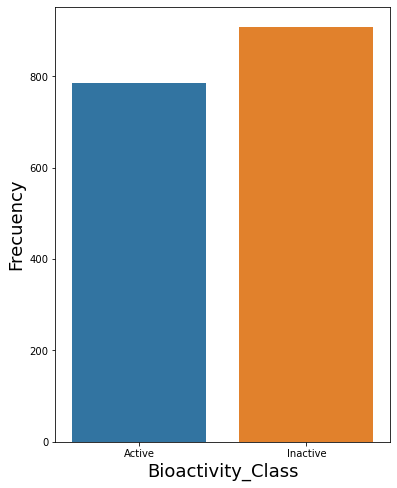

In [93]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,8))

sns.countplot(x = 'Bioactivity_class', data = df_ML_2class)

plt.ylabel("Frecuency", fontsize = 18)
plt.xlabel("Bioactivity_Class", fontsize = 18)

# Bioactivity Species Plot

Text(0.5, 0, 'Bioactivity_class')

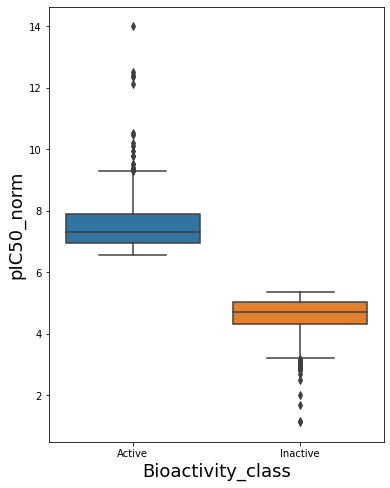

In [88]:
fig, ax = plt.subplots(figsize=(6,8))
sns.boxplot(y = 'pIC50_norm', x = 'Bioactivity_class', data = df_ML_2class)
plt.ylabel('pIC50_norm', fontsize = 18)
plt.xlabel('Bioactivity_class', fontsize = 18)